In [93]:
#基于神经网络的手写识别，识别数字０－９
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf

In [94]:
def loadData(filename):
    data = sio.loadmat(filename)
    return data

In [95]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [96]:
def sigmoidGradient(z):
    return sigmoid(z)*(1-sigmoid(z))

In [97]:
def initilizeThetaWeights(L_in,L_out):
    epsilon = np.sqrt(6)/np.sqrt(L_in+L_out)
    return np.random.rand(L_out,L_in)*2*epsilon-epsilon

In [98]:
def nnCostFunction(X,Theta1,Theta2,y,num_labels,m,_lambda):
    a1 = np.vstack((np.ones(m),X.T)).T
    a2 = sigmoid(np.dot(a1,Theta1.T))
    a2 = np.vstack((np.ones(m),a2.T)).T
    a3 = sigmoid(np.dot(a2,Theta2.T))
    y = np.tile((np.arange(num_labels)+1)%10,(m,1)) == np.tile(y,(1,num_labels))
    regTheta1 = Theta1[:,1:]
    regTheta2 = Theta2[:,1:]
    
    J = -np.sum(y*np.log(a3)+(1-y)*np.log(1-a3))/m+_lambda*np.sum(regTheta1*regTheta1)/m/2+_lambda*np.sum(regTheta2*regTheta2)/m/2
    
    delta2 = np.zeros(Theta1.shape)
    delta3 = np.zeros(Theta2.shape)
    
    for i in range(m):
        a1_ = a1[i];a2_=a2[i];a3_=a3[i]
        d3 = a3_-y[i]
        d2 = np.dot(d3,Theta2)*sigmoidGradient(np.append(1,np.dot(a1_,Theta1.T)))
        delta2 = delta2 + np.dot(d2[1:].reshape(-1,1),a1_.reshape(1,-1))
        delta3 = delta3 + np.dot(d3.reshape(-1,1),a2_.reshape(1,-1))
        Theta1_grad = np.zeros(Theta1.shape)
        Theta2_grad = np.zeros(Theta2.shape)
        Theta1_grad[:,0] = delta2[:,0]/m
        Theta2_grad[:,0] = delta3[:,0]/m
        Theta1_grad[:,1:] = delta2[:,1:]/m + _lambda*regTheta1/m
        Theta2_grad[:,1:] = delta3[:,1:]/m + _lambda*regTheta2/m
    return J,Theta1_grad,Theta2_grad

In [99]:
def gradientDescent(Theta1,Theta2,X,y,num_labels,m,_lambda,iter_num,learning_rate):
    i = 0
    J_list = []
    J,Theta1_grad,Theta2_grad = nnCostFunction(X,Theta1,Theta2,y,num_labels,m,_lambda)
    while i < iter_num:
        Theta1 = Theta1 - learning_rate*Theta1_grad
        Theta2 = Theta2 - learning_rate*Theta2_grad
        J,Theta1_grad,Theta2_grad = nnCostFunction(X,Theta1,Theta2,y,num_labels,m,_lambda)
        J_list.append(J)
        i+=1
        print('迭代:',i,'->','J:',J)
    return J_list
        

In [100]:
def predict(Theta1,Theta2,X,m):
    a1 = np.vstack((np.ones(m),X.T)).T
    a2 = sigmoid(np.dot(a1,Theta1.T))
    a2 = np.vstack((np.ones(m),a2.T)).T
    a3 = sigmoid(np.dot(a2,Theta2.T))
    return np.argmax(a3,axis=1)

(401, 25) (10, 26) (3000, 400)
迭代: 1 -> J: 0.39258268719046385
迭代: 2 -> J: 0.38172657348681144
迭代: 3 -> J: 0.3753078961624206
迭代: 4 -> J: 0.3707278871588442
迭代: 5 -> J: 0.36715039715537046
迭代: 6 -> J: 0.3641951317551498
迭代: 7 -> J: 0.3616612280704919
迭代: 8 -> J: 0.35943150146939135
迭代: 9 -> J: 0.35743229738407983
迭代: 10 -> J: 0.35561449900377695
迭代: 11 -> J: 0.3539437319768687
迭代: 12 -> J: 0.3523949593629182
迭代: 13 -> J: 0.3509493302623222
迭代: 14 -> J: 0.349592253636778
迭代: 15 -> J: 0.34831217167967626
迭代: 16 -> J: 0.34709974990848724
迭代: 17 -> J: 0.34594732487838037
迭代: 18 -> J: 0.3448485166719958
迭代: 19 -> J: 0.34379794996119467
迭代: 20 -> J: 0.34279104863338644
迭代: 21 -> J: 0.34182388149722176
迭代: 22 -> J: 0.34089304427839356
迭代: 23 -> J: 0.33999556792593477
迭代: 24 -> J: 0.3391288463552326
迭代: 25 -> J: 0.3382905787914914
迭代: 26 -> J: 0.3374787232495938
迭代: 27 -> J: 0.3366914586249713
迭代: 28 -> J: 0.33592715352583036
迭代: 29 -> J: 0.33518434044208734
迭代: 30 -> J: 0.3344616941818147
迭代:

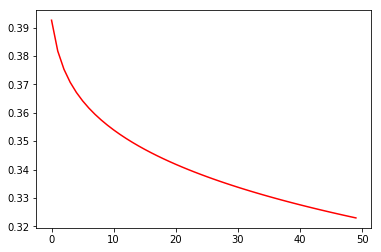

[6 6 6 ... 9 9 9]
[[6]
 [6]
 [6]
 ...
 [9]
 [9]
 [9]]

Training Set Accuracy: 97.400000



In [101]:
if_use_ex4weight = 1
input_layer_size = 401
hidden_layer_size = 25
num_labels = 10
iter_num = 50
learning_rate = 2
_lambda = 1
data = loadData('ex4data1.mat')
present = 0.6
X_ = data['X']
y_ = data['y']%10
# print(len(X_)*present)
X = X_[:int(len(X_)*present)]
y = y_[:len(X)]
predict_x = X_[len(X):]
predict_y = y_[len(X):]
m = X.shape[0]
Theta1_L_in = 401
Theta1_L_out = 25
Theta2_L_in = 26
Theta2_L_out = 10
if if_use_ex4weight == 0:
    Theta1 = initilizeThetaWeights(Theta1_L_in,Theta1_L_out)
    Theta2 = initilizeThetaWeights(Theta2_L_in,Theta2_L_out)
else:
    data_weights = loadData('ex4weights.mat')
    Theta1 = data_weights['Theta1']
    Theta2 = data_weights['Theta2']
print(Theta1.T.shape,Theta2.shape,X.shape)
J_list = gradientDescent(Theta1,Theta2,X,y,num_labels,m,_lambda,iter_num,learning_rate)
J_list = np.asarray(J_list).reshape(1,iter_num)[0]
plt.plot(np.arange(0,iter_num,1),np.array(J_list).reshape(iter_num,1),'-r')
plt.show()
pred = (predict(Theta1,Theta2,predict_x,predict_x.shape[0])+1)%10
print(pred)
print(predict_y)
print('\nTraining Set Accuracy: %f\n'%(np.mean(np.double(pred == predict_y.T)) * 100))



In [102]:
import tensorflow as tf
batch_size=10
theta1=tf.Variable(tf.random_normal([400,26],stddev=1,seed=1))
theta2=tf.Variable(tf.random_normal([26, 1], stddev=1, seed=1))
x_a=tf.placeholder(tf.float32,shape=(None,400))
y_a=tf.placeholder(tf.float32,shape=(None,1))
a=tf.matmul(x_a,theta1)
y_n=tf.matmul(a,theta2)
prection=tf.nn.tanh(y_n)

cross_entropy=-tf.reduce_mean(y_a*tf.log(tf.clip_by_value(y_n,1e-10,1.0)))
train_step=tf.train.AdamOptimizer(learning_rate=0.01).minimize(cross_entropy)
STEPS = 10000
with tf.Session() as sess:
    init_op=tf.global_variables_initializer()
    sess.run(init_op)
    # 输出目前（未经训练）的参数取值。
    print("w1:", sess.run(theta1))
    print("w2:", sess.run(theta2))
#     print("\n")
    for i in range(STEPS):
        start = (i * batch_size) % len(X)
        end = (i * batch_size) % len(X) + batch_size
        sess.run(train_step, feed_dict={x_a: X[start:end], y_a: y[start:end]})
        if i % 1000 == 0:
            total_cross_enpy = sess.run(cross_entropy, feed_dict={x_a: X, y_a: y})
            print("After %d training step(s), cross entropy on all data is %g" % (i, total_cross_entropy))
            # 输出训练后的参数取值。tro
    prediction_value = sess.run(prection,feed_dict={x_a:predict_x})
    print('\nTraining Set Accuracy: %.2f\n'%(np.mean(np.double(prediction_value == predict_y)) * 100))
    print("\n")
    print("w1:", sess.run(theta1))
    print("w2:", sess.run(theta2))
    print(prediction_value)

w1: [[-0.8113182   1.4845988   0.06532937 ...  0.32066926  1.132831
  -2.2782571 ]
 [ 0.48281202 -1.3127087   0.35685033 ... -0.7706542  -0.74624157
  -0.28195325]
 [-1.9588155  -0.3376107   1.0301983  ... -0.30744898 -0.7669297
  -0.28710833]
 ...
 [ 1.0998409   0.03693226  0.44521236 ... -0.03898062  0.29257604
  -0.31505573]
 [-0.798138    1.0684257   1.1696315  ...  0.21108748  0.00749771
   0.01269779]
 [-0.02291953 -0.1323976  -0.22013924 ...  1.0481157  -1.55838
   1.8832947 ]]
w2: [[-0.8113182 ]
 [ 1.4845988 ]
 [ 0.06532937]
 [-2.4427042 ]
 [ 0.0992484 ]
 [ 0.5912243 ]
 [ 0.59282297]
 [-2.1229296 ]
 [-0.72289723]
 [-0.05627038]
 [ 0.6435448 ]
 [-0.26432407]
 [ 1.8566332 ]
 [ 0.5678417 ]
 [-0.3828359 ]
 [-1.4853433 ]
 [ 1.2617711 ]
 [-0.02530608]
 [-0.2646297 ]
 [ 1.5328138 ]
 [-1.7429771 ]
 [-0.43789294]
 [-0.56601   ]
 [ 0.32066926]
 [ 1.132831  ]
 [-2.2782571 ]]
After 0 training step(s), cross entropy on all data is 0.122805
After 1000 training step(s), cross entropy on all d

In [18]:
import tensorflow as tf
import numpy as np


In [47]:
data = np.array([[1]])
x = tf.placeholder(tf.float32,[1,1])
w = tf.Variable(0,dtype=tf.float32)
cost = x[0][0]-w**2
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)
init = tf.global_variables_initializer()
session = tf.Session()
session.run(init)
# session.run(train)
# print(session.run(w))
for i in range(1500):
    session.run(train,feed_dict={x:data})
print(session.run(w))

0.0


In [48]:
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = input2+input3
mul = intermed * input1
result = session.run([mul,intermed])
print(result)

[21.0, 7.0]


In [147]:
x_data = np.float32(np.random.rand(100,2))
y_data = np.dot(x_data,[[0.1],[0.2]])+0.3
y_data[y_data>=0.5]=1
y_data[y_data<0.5]=0
predict_y=y_data[60:]
x = tf.placeholder(tf.float32,shape=(None,2))
b = tf.Variable(tf.zeros([1]))
w = tf.Variable(tf.random_uniform([2,1],0,0))
y = tf.matmul(x,w) +b
loss = tf.reduce_mean(tf.square(y-y_data[:60]))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

with tf.Session() as sess:
    init = tf.initialize_all_variables()
    sess.run(init)
    for step in range(0,500):
        sess.run(train,feed_dict={x:x_data[:60]})  
    print(sess.run([w,b]))
    predict=sess.run(y,feed_dict={x:x_data[60:]})
    predict[predict>=0.5]=1
    predict[predict<0.5]=0
    print('\nTraining Set Accuracy: %.2f\n'%(np.mean(np.double(predict == predict_y)) * 100))


[array([[0.44579133],
       [1.0637012 ]], dtype=float32), array([-0.49301356], dtype=float32)]

Training Set Accuracy: 95.00

